In [8]:
import mlrose_hiive
import numpy as np
import pandas as pd
np.random.seed(44)

def getFitnessInfo(runStats):
    lastIteration = runStats[runStats.Iteration != 0].reset_index()
    fitnessMean = lastIteration.Fitness.mean()
    fitnessMax = lastIteration.Fitness.max()
    maxTime = lastIteration.Time.max()
    meanTime = lastIteration.Time.mean()
    print('fitnessMax: ', fitnessMax)
    print('fitnessMean: ', fitnessMean)
    print('maxTime: ', maxTime, 'sec')
    print('meanTime: ', meanTime, 'sec')

def plotFitness(algoValue, title, xLabel, yLabel):
    bestCurve = algoValue['bestCurve']
    ax = bestCurve.Fitness.plot(marker='.', markersize=2, figsize=(10,10), grid=1, title=title)
    ax.set_ylabel(yLabel)
    ax.set_xlabel(xLabel)
    return ax

def getBestValues(curves, algo):
    value = {}
    bestIndexCurve = curves.Fitness.idxmax()
    if(algo == "sa"):
        bestDecay = curves.iloc[bestIndexCurve].Temperature
        bestCurve = curves.loc[curves.Temperature == bestDecay, :]
    elif(algo == "rhc"):
        bestDecay = curves.iloc[bestIndexCurve].current_restart
        bestCurve = curves.loc[curves.current_restart == bestDecay, :]
        
    bestCurve.reset_index(inplace=True)
    value['bestCurve'] = bestCurve
    value['bestDecay'] = bestDecay
    return value

def getFitnessByFeatures(runStats, algo):
    lastIteration = runStats[runStats.Iteration != 0].reset_index()
    
    print("Overall Max Fitness: ", lastIteration.Fitness.max())
    print("Overall Mean Fitness: ", lastIteration.Fitness.mean())
    print("Overall Max Time: ", lastIteration.Time.max())
    print("Overall Mean Time: ", lastIteration.Time.mean())
    
    print('==========================================')
    
    if(algo == "ga"):
        mutationRateFitnessMean = lastIteration.groupby("Mutation Rate").Fitness.mean()
        populationSizeFitnessMean = lastIteration.groupby("Population Size").Fitness.mean()
        populationSizeTimeMean = lastIteration.groupby("Population Size").Time.mean() 
        print('MR      Mean Fitness:       ', mutationRateFitnessMean)

    elif(algo == "mimic"):
        keepPercentFitnessMean = lastIteration.groupby("Keep Percent").Fitness.mean()
        populationSizeFitnessMean = lastIteration.groupby("Population Size").Fitness.mean()
        populationSizeTimeMean = lastIteration.groupby("Population Size").Time.mean()
        print('keep%      Mean Fitness:       ', keepPercentFitnessMean)

    print('PS      Mean Fitness:      ', populationSizeFitnessMean)
    print('PS      Mean Time:      ', populationSizeTimeMean)

In [2]:
bits = 100
flipFlopProblem = mlrose_hiive.FlipFlopOpt(length=bits)

fitnessMax:  87.0
fitnessMean:  79.82178217821782
maxTime:  262.428596361 sec
meanTime:  87.61704040404952 sec
CPU times: user 4min 19s, sys: 2.15 s, total: 4min 21s
Wall time: 4min 22s


<AxesSubplot:title={'center':'Fitness vs Iteration'}, xlabel='Iterations', ylabel='Fitness Value'>

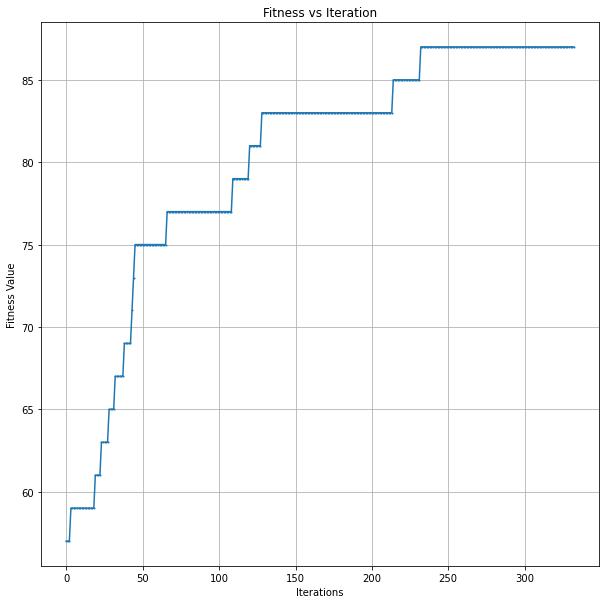

In [5]:
%%time
##Random Hill Climb
rhc = mlrose_hiive.RHCRunner(flipFlopProblem, experiment_name="RCH_final", iteration_list=[1000],
                                       seed=44, max_attempts=100, 
                                       restart_list=[100])

rhcRunStats, rhcRunCurves = rhc.run()
rhcVal = getBestValues(rhcRunCurves, 'rhc')

getFitnessInfo(rhcRunStats)
plotFitness(rhcVal, "Fitness vs Iteration","Iterations", "Fitness Value")

Best Decay {'bestCurve':       index  Iteration      Time  Fitness  FEvals Temperature  max_iters
0         0          0  0.000703     45.0     0.0           1       1000
1         1          1  0.003743     45.0     1.0           1       1000
2         2          2  0.004340     47.0     3.0           1       1000
3         3          3  0.004923     47.0     5.0           1       1000
4         4          4  0.005503     47.0     7.0           1       1000
...     ...        ...       ...      ...     ...         ...        ...
996     996        996  0.602337     92.0  1273.0           1       1000
997     997        997  0.603079     92.0  1274.0           1       1000
998     998        998  0.603811     92.0  1275.0           1       1000
999     999        999  0.604761     92.0  1277.0           1       1000
1000   1000       1000  0.605499     92.0  1278.0           1       1000

[1001 rows x 7 columns], 'bestDecay': GeomDecay(init_temp=1, decay=0.99, min_temp=0.001)}
fitnessM

<AxesSubplot:title={'center':'Fitness vs Iterations (SA)'}, xlabel='Iterations', ylabel='Fitness'>

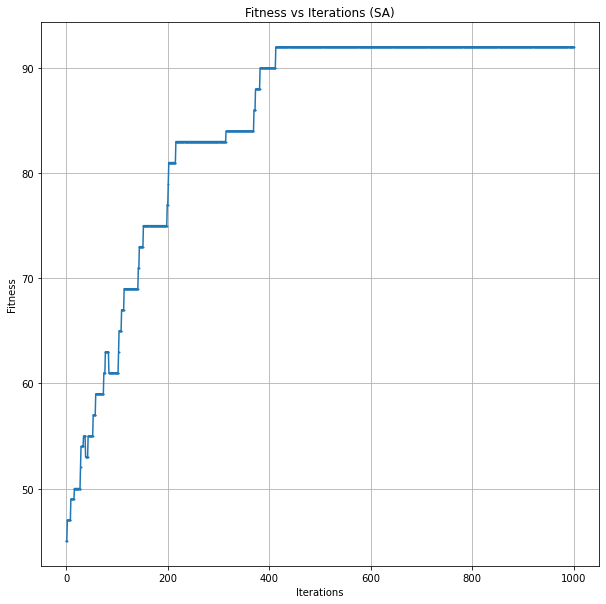

In [11]:
%%time
##Simulated Annealing
sa = mlrose_hiive.SARunner(flipFlopProblem, experiment_name="SA_final", iteration_list=[1000],
                           temperature_list=[1, 10, 25, 50, 100, 200, 500, 1000], decay_list=[mlrose_hiive.GeomDecay, mlrose_hiive.ExpDecay], seed=44, max_attempts=100)

saRunStats, saRunCurves = sa.run()
saVal = getBestValues(saRunCurves, 'sa')
print("Best Decay", saVal)

getFitnessInfo(saRunStats)
plotFitness(saVal, 'Fitness vs Iterations (SA)', 'Iterations', 'Fitness')

In [6]:
%%time
##Genetic Algorithm
ga = mlrose_hiive.GARunner(flipFlopProblem, experiment_name='GA_final', iteration_list=[1000], 
                           population_sizes=[100, 500, 1000], mutation_rates=[0.1, 0.25, 0.5, 0.9], 
                           seed=44, max_attempts=100)

gaRunStats, gaRunCurves = ga.run()
getFitnessByFeatures(gaRunStats, 'ga')

Overall Max Fitness:  99.0
Overall Mean Fitness:  94.41666666666667
Overall Max Time:  9.292162370000028
Overall Mean Time:  4.008253766749998
MR      Mean Fitness:        Mutation Rate
0.10    93.666667
0.25    93.666667
0.50    95.333333
0.90    95.000000
Name: Fitness, dtype: float64
PS      Mean Fitness:       Population Size
100     90.50
500     95.00
1000    97.75
Name: Fitness, dtype: float64
PS      Mean Time:       Population Size
100     0.871651
500     3.820347
1000    7.332763
Name: Time, dtype: float64
CPU times: user 47.7 s, sys: 247 ms, total: 48 s
Wall time: 48.2 s


In [9]:
%%time
##Mimic Algorithm
mimic = mlrose_hiive.MIMICRunner(flipFlopProblem, experiment_name='MIMIC_final', iteration_list=[1000], use_fast_mimic=True,
                                population_sizes=[100,500], keep_percent_list=[0.1, 0.25, 0.5, 0.9],
                                seed=44, max_attempts=100)

mimicRunStats, mimicRunCurves = mimic.run()
getFitnessByFeatures(mimicRunStats, 'mimic')

Overall Max Fitness:  95.0
Overall Mean Fitness:  84.875
Overall Max Time:  37.077477603000034
Overall Mean Time:  14.455845337874962
keep%      Mean Fitness:        Keep Percent
0.10    84.5
0.25    86.5
0.50    86.5
0.90    82.0
Name: Fitness, dtype: float64
PS      Mean Fitness:       Population Size
100    79.25
500    90.50
Name: Fitness, dtype: float64
PS      Mean Time:       Population Size
100     5.354884
500    23.556807
Name: Time, dtype: float64
CPU times: user 1min 35s, sys: 19.4 s, total: 1min 54s
Wall time: 1min 55s
